In [11]:
from typing import Union, List
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np

In [12]:
def V(num: int) -> int:
    return 4*num+1

def S(num: int) -> int:
    return 2*num+1

def fG(num: int) -> int:
    return 2*num-1

def getType(num):
    if (num+1) % 3 == 0:
        return "A"
    elif (num % 3) == 0:
        return "B"
    elif (num - 1) % 3 == 0:
        return "C"

def toBinVec(x, l=0) -> list:
    result = [int(i) for i in bin(x)[2:]]
    missing_zeros = l-len(result)
    if (missing_zeros > 0):
        for i in range(missing_zeros):
            result.insert(0, 0)
    return result

def ruleTwo(num):
    result = (num-1)/2
    r = 0
    k = 0
    while result % 2 != 0:
        result = (result-1)/2
        k+=1
    r = result/2
    if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
        return True
    else:
        return False


In [13]:
class Tree:
    def __init__(self, num_rows):
        self.num_rows = num_rows
        self.rows = []
        self.markedRows = []
        self.generate()
 
    def generate(self):
        for i in range(self.num_rows):
            row = []
            for j in range(2**i, 2**(i+1)):
                if j % 2 is 1:
                    node = Node(j)
                    row.append(node)
            self.rows.append(row)
   
    def getNode(self, label):
        row = Node.getRow(label)
        if row < self.num_rows:
            return self.rows[row][(label-(2**row+1))//2]
        return None

    def getGeom(self) -> Union[List[int], List[int], List[str]]:
        arr_x = []
        arr_y = []
        arr_colors = []
        for i, row in enumerate(self.rows):
            for j, node in enumerate(row):
                row_half = len(row) / 2
                x = 0.5 if (row_half < 1) else j-row_half+1
                arr_x.append(x)
                arr_y.append(i)
                color = "black" 
                if node.state == NodeState.ORANGE:
                    color = "orange"
                elif node.state == NodeState.BLUE:
                    color = "blue"
                arr_colors.append(color)
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
        return arr_x, arr_y, arr_colors
   
    def mark(self, label):
        node = self.getNode(label)
        if node is not None and node.state != NodeState.BLUE:
            #print("{0}".format(label))
            node.state = NodeState.ORANGE

    def checkTreeFrozen(self) -> bool:
        for row in self.rows:
            for node in row:
                if node.state == NodeState.ORANGE:
                    return False
                
        return True

    def checkRowMarked(self) -> int:
        #print(self.markedRows)
        for i, row in enumerate(self.rows):
            rowIsMarked = True
            for node in row:
                if node.state == NodeState.BLACK:
                    rowIsMarked = False
                    break
            if rowIsMarked == True:
                if i not in self.markedRows:
                    self.markedRows.append(i)
                    return i            
        return -1

    def debugTree(self):
        for row in self.rows:
            for node in row:
                print("{0}-{1}".format(node.label, node.state), end =" ")
            print('\n')

class NodeState():    
    BLACK = 1
    ORANGE = 2
    BLUE = 3

class Node:
    def __init__(self, label):
        self.tree = None
        self.row = Node.getRow(label)
        self.state = NodeState.BLACK
        self.label = label
   
    @staticmethod
    def getRow(label: int) -> int:
        return int(math.log(label,2))
 
    @staticmethod
    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

def isIncluded(numberArr, number):

    if len(numberArr) > 0:
        numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

21
5
85
21
3
341
113
13
227
453
75
53
17
151
301
213
35
69
11
201
401
141
23
277
45
7
403
267
93
15
369
181
29
9
373
61
241
117
19
37
497
245
81
483
321
469
77
25
149
49
331
163
325
309
51
101
33
99
197
65
441
217
433
205
405
67
133
397
131
261
43
435
289
273
269
89
177
87
173
57
385
179
357
59
355
349
115
229
119
237
39
473
465
461
153
305
477
79
157
315
307
203
317
105
209
409
407
135
211
421
419
139
271
281
279
185
361
187
371
123
481
375
249
247
493
499
329
219
439


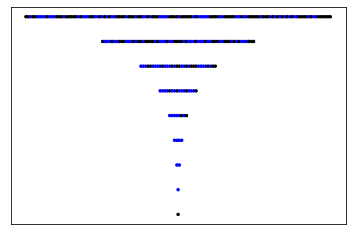

In [19]:
# dotsize=24 (n<=6)
dotsize= 6 #(n=9)
# dotsize= 1 (n>9)
n = 9
#dotsize = 24

tree = Tree(n)

proved = []
start = 21

first_node = tree.getNode(start)
first_node.state = NodeState.BLUE
tree.mark(start)
proved.append(start)
included = []
#print(2**(n+1))

if ruleTwo(start) == False:
    
    if int((start-1)/4)%2 != 0:
        proved.append(int((start-1)/4))
    if int((start-1)/2)%2 != 0:
        proved.append(int((start-1)/2))


while len(proved)>0:
    for i in proved:
        #i = proved[0]
        print(i)
        if i < 2**(n+2):
            
            node = tree.getNode(i)
            #tree.mark(i)

            if Node.getType(i) == 2:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 2**(n):
                    tree.mark(V(i))
                    proved.append(V(i))
                    included.append(V(i))
                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 2**(n):    
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))
                
                node.state = NodeState.BLUE
                proved.remove(i)
                break

            if Node.getType(i) == 3:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 2**(n):   
                    tree.mark(V(i)) 
                    proved.append(V(i))  
                    included.append(V(i))           
                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 2**(n):       
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))
                # RULE 3 : if x is orange and of type C then ((4x-1)/3) becomes orange         
                if isIncluded(included, int((4*i-1)/3)) == False and int((4*i-1)/3) < 2**(n):       
                    tree.mark(int((4*i-1)/3))
                    proved.append(int((4*i-1)/3))
                    included.append(int((4*i-1)/3))

                node.state = NodeState.BLUE
                proved.remove(i)
                break
            
            if Node.getType(i) == 1:
                # RULE 1 : if x is orange V(x) becomes orange 
                if isIncluded(included, V(i)) == False and V(i) < 2**(n):
                    tree.mark(V(i))
                    proved.append(V(i))
                    included.append(V(i))
                # RULE 2 : if x is orange S(x) becomes orange
                if isIncluded(included, S(i)) == False and S(i) < 2**(n):       
                    r2 = ruleTwo(i)
                    if r2:
                        tree.mark(S(i))
                        proved.append(S(i))
                        included.append(S(i))
                # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange
                if isIncluded(included, int(fG(i)/3)) == False and int(fG(i)/3) < 2**(n): 
                    tree.mark(int(fG(i)/3))
                    proved.append(int(fG(i)/3))
                    included.append(int(fG(i)/3))

                node.state = NodeState.BLUE
                proved.remove(i)
                break
    
x, y, colors = tree.getGeom()
plt.scatter(x, y, s=dotsize, c=colors)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)     

plt.show()